# Проект: Линейные модели в машинном обучении

<a id='section_id'></a>
## Содержание 
[1. Описание исследования](#section_id1)

[____1.1. Описание данных](#section_id2)

[____1.2. Цель исследования](#section_id3)

[____1.3. Ход исследования](#section_id4)

[2. Предобработка данных](#section_id5)

[____2.1. Работа с названиями столбцов](#section_id6)

[____2.2. Обработка дубликатов](#section_id7)

[____2.3. Обработка пропусков](#section_id8)

[____2.4. Преобразование типов данных](#section_id9)

[3. Исследовательский анализ](#section_id10)

[____3.1. Статистический анализ признаков](#section_id11)

[____3.2. Графики признаков](#section_id12)

[____3.3. Выводы о данных](#section_id13)

[4. Корреляционный анализ](#section_id14)

[____4.1. Коэффициенты корреляции](#section_id15)

[____4.2. Диаграммы рассеяния](#section_id16)

[____4.3. Выводы о взаимосвязи признаков](#section_id17)

[5. Задача регрессии](#section_id18)

[____5.1. Обучение модели 1 линейной регрессии](#section_id19)

[____5.2. Обучение модели 2 линейной регрессии](#section_id20)

[____5.3. Обучение модели 3 линейной регрессии](#section_id21)

[____5.4. Сравнение качества моделей](#section_id22)

[____5.5. Оценка качества с помощью метрик](#section_id23)

[____5.6. Прогноз удоя](#section_id24)

[6. Задача классификации](#section_id25)

[____6.1. Обучение модели логистической регрессии](#section_id26)

[____6.2. Анализ модели](#section_id27)

[____6.3. Прогноз вкуса молока](#section_id28)

[7. Итоговые выводы](#section_id29)

<a id='section_id1'></a>
## 1. Описание исследования
[к содержанию](#section_id)

        Выполняется на заказ проект по машинному обучению для молочного хозяйства «Вольный луг». Требуется изучить вариант расширения поголовья стада коров, для чего был заключен контракта с ассоциацией пастбищ «ЭкоФерма».
        Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям.
        Поэтому поставлена задача, разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
            Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
            Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
        С помощью модели нужно отобрать коров по двум критериям:
            средний удой за год — не менее 6000 килограммов;
            молоко должно быть вкусным.

<a id='section_id2'></a>
### 1.1. Описание данных
[к содержанию](#section_id)

        Данные представлены в виде трех файлов:
            ferma_main.csv
            ferma_dad.csv
            cow_buy.csv
        1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
            id — уникальный идентификатор коровы.
            Удой, кг — масса молока, которую корова даёт в год (в килограммах).
            ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
            Сырой протеин, г — содержание сырого протеина в корме (в граммах).
            СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
            Порода — порода коровы.
            Тип пастбища — ландшафт лугов, на которых паслась корова.
            Порода папы_быка — порода папы коровы.
            Жирность,% — содержание жиров в молоке (в процентах).
            Белок,% — содержание белков в молоке (в процентах).
            Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
            Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
        Признаки в датасете ferma_main.csv можно разделить на группы.
            Характеристики коровы: id, Порода, порода папы_быка, Возраст.
            Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
            Характеристика пастбища: Тип пастбища.
            Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
        2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
            id — уникальный идентификатор коровы.
            Имя Папы — имя папы коровы.
        3. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
            Порода — порода коровы.
            Тип пастбища — ландшафт лугов, на которых паслась корова.
            порода папы_быка — порода папы коровы.
            Имя_папы — имя папы коровы.
            Текущая_жирность,% — содержание жиров в молоке (в процентах).
            Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
            Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
        Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей. Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм. Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%. Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать.

<a id='section_id3'></a>
### 1.2. Цель исследования
[к содержанию](#section_id)

        Цель исследования -  оценить влияние различных факторов на объем удоя и вкуса молока, на основе этой информации разработать модели, для предсказания этих двух параметров.

<a id='section_id4'></a>
### 1.3. Ход исследования
[к содержанию](#section_id)

        1. Загрузка и изучение данных
        2. Предобработка: проверка правильности данных, обработка пропусков и дубликатов
        3. Исследовательский анализ данных
        4. Корреляционный анализ признаков, поиск взаимосвязей
        5. Разработка моделей линейной регрессии
        6. Разработка модели классификации
        7. Формулирование выводов о проделанной работе

<a id='section_id5'></a>
## 2. Предобработка данных
[к содержанию](#section_id)

In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
                            accuracy_score, precision_score, recall_score, confusion_matrix)
import scipy.stats as st

In [2]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

In [3]:
# загрузка данных
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [4]:
# функция для обзора данных
def preview(dataset):
    '''Функция принимает на вход набор данных и выводит основную информацию о нем.'''
    display(dataset.head())
    print(dataset.info())
    display(dataset.describe())
    display(dataset.describe(include='object'))

In [5]:
# обзор данных ferma_main
preview(ferma_main)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


,ЭКЕ (Энергетическая кормовая единица),СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
count,634,634,634,634,634,634,634,634,634
unique,55,12,2,3,3,50,15,2,2
top,"14,7","0,94",Вис Бик Айдиал,Холмистое,Соверин,"3,72","3,076",вкусно,более_2_лет
freq,27,172,373,356,316,112,103,371,524


In [6]:
# обзор данных ferma_dad
preview(ferma_dad)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


,Имя Папы
count,629
unique,4
top,Барин
freq,240


In [7]:
# обзор данных cow_buy
preview(cow_buy)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,4","3,074",более_2_лет
freq,11,11,12,8,3,5,15


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,4","3,074",более_2_лет
freq,11,11,12,8,3,5,15


<a id='section_id6'></a>
### 2.1. Работа с названиями столбцов
[к содержанию](#section_id)

In [8]:
# переименование столбцов набора данных о ферме
ferma_main = ferma_main.rename(columns={
    'Удой, кг' : 'milk',
    'ЭКЕ (Энергетическая кормовая единица)' : 'energy',
    'Сырой протеин, г' : 'raw_protein',
    'СПО (Сахаро-протеиновое соотношение)' : 'sugar_protein',
    'Порода' : 'breed',
    'Тип пастбища' : 'pasture',
    'порода папы_быка' : 'breed_father',
    'Жирность,%' : 'fat',
    'Белок,%' : 'protein',
    'Вкус молока' : 'taste',
    'Возраст' : 'age'
})
display(ferma_main.head(2))

,id,milk,energy,raw_protein,sugar_protein,breed,pasture,breed_father,fat,protein,taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет


In [9]:
# переименование столбцов в наборе данных о родителях коров
ferma_dad = ferma_dad.rename(columns={
    'Имя Папы' : 'father_name'
})
display(ferma_dad.head(2))

,id,father_name
0,1,Буйный
1,2,Соловчик


In [10]:
# переименование столбцов в наборе данных о покупке коровы
cow_buy = cow_buy.rename(columns={
    'Порода' : 'breed',
    'Тип пастбища' : 'pasture',
    'порода папы_быка' : 'breed_father',
    'Имя_папы' : 'father_name',
    'Текущая_жирность,%' : 'current_fat',
    'Текущий_уровень_белок,%' : 'current_protein',
    'Возраст' : 'age'
})
display(cow_buy.head(2))

,breed,pasture,breed_father,father_name,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет


<a id='section_id7'></a>
### 2.2. Обработка дубликатов
[к содержанию](#section_id)

In [11]:
# проверка наличия полных дубликатов в наборе данных о ферме
print(ferma_main.duplicated().sum())

5


In [12]:
# удаление полных дубликатов в наборе данных о ферме
ferma_main = ferma_main.drop_duplicates()
print(ferma_main.duplicated().sum())

0


In [13]:
# проверка неявных дубликатов в наборе данных о ферме
print(ferma_main.duplicated('id').sum())

0


In [14]:
# проверка наличия полных дубликатов в наборе данных о папах коров
print(ferma_dad.duplicated().sum())

0


In [15]:
# проверка неявных дубликатов в наборе данных о папах коров
print(ferma_dad.duplicated('id').sum())

0


In [16]:
# проверка полных дубликатов в наборе данных о покупке коров
print(cow_buy.duplicated().sum())

4


In [17]:
# удаление явных дубликатов в наборе данных о покупке коров
cow_buy = cow_buy.drop_duplicates()
print(cow_buy.duplicated().sum())

0


<a id='section_id8'></a>
### 2.3. Обработка пропусков
[к содержанию](#section_id)

In [18]:
# опреление количества пропусков в наборе данных о ферме
display(ferma_main.isna().sum())

id               0
milk             0
energy           0
raw_protein      0
sugar_protein    0
breed            0
pasture          0
breed_father     0
fat              0
protein          0
taste            0
age              0
dtype: int64

In [19]:
# опреление количества пропусков в наборе данных о папе коровы
display(ferma_dad.isna().sum())

id             0
father_name    0
dtype: int64

In [20]:
# опреление количества пропусков в наборе данных о покупке коровы
display(cow_buy.isna().sum())

breed              0
pasture            0
breed_father       0
father_name        0
current_fat        0
current_protein    0
age                0
dtype: int64

<a id='section_id9'></a>
### 2.4. Преобразование типов данных
[к содержанию](#section_id)

In [21]:
# функция для изменения типа данных в наборе данных на float64
def dtype_change(data, col):
    '''Функция принимает на вход набор данных и название столбца, меняет тип данных в столбце на float64'''
    data[col] = data[col].str.replace(',', '.')
    data[col] = data[col].astype('float64')

In [22]:
# изменение типов данных в наборе данных о ферме
cols = ['energy', 'sugar_protein', 'fat', 'protein']

for col in cols:
    dtype_change(ferma_main, col)
    
print(ferma_main.info())
display(ferma_main.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             629 non-null    int64  
 1   milk           629 non-null    int64  
 2   energy         629 non-null    float64
 3   raw_protein    629 non-null    int64  
 4   sugar_protein  629 non-null    float64
 5   breed          629 non-null    object 
 6   pasture        629 non-null    object 
 7   breed_father   629 non-null    object 
 8   fat            629 non-null    float64
 9   protein        629 non-null    float64
 10  taste          629 non-null    object 
 11  age            629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB
None


,id,milk,energy,raw_protein,sugar_protein,breed,pasture,breed_father,fat,protein,taste,age
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет


In [23]:
# изменение типов данных в наборе данных о покупке коров
cols = ['current_fat', 'current_protein']

for col in cols:
    dtype_change(cow_buy, col)
    
print(cow_buy.info())
display(cow_buy.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            16 non-null     object 
 1   pasture          16 non-null     object 
 2   breed_father     16 non-null     object 
 3   father_name      16 non-null     object 
 4   current_fat      16 non-null     float64
 5   current_protein  16 non-null     float64
 6   age              16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB
None


,breed,pasture,breed_father,father_name,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет


**Краткий вывод:** Проведена предобработка данных. Изменены названия столбцов. Обнаружено 5 дубликатов в данных о ферме и 4 в данных о покупке. Пропусков не обнаружено. Изменены типы данных в столбцах с дробными числами на float64 

<a id='section_id10'></a>
## 3. Исследовательский анализ
[к содержанию](#section_id)

<a id='section_id11'></a>
### 3.1. Статистический анализ признаков
[к содержанию](#section_id)

In [24]:
# статистический анализ количественных признаков набора данных о ферме
ferma_main.describe()

,id,milk,energy,raw_protein,sugar_protein,fat,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [25]:
# статистический анализ категориальных признаков набора данных о ферме
ferma_main.describe(include='object')

,breed,pasture,breed_father,taste,age
count,629,629,629,629,629
unique,2,3,3,2,2
top,Вис Бик Айдиал,Холмистое,Соверин,вкусно,более_2_лет
freq,373,351,311,371,519


In [26]:
# статистический анализ категориальных признаков
# набора данных об отцах коров
ferma_dad.describe(include='object')

,father_name
count,629
unique,4
top,Барин
freq,240


In [27]:
# статистический анализ количественных признаков набора данных
# о покупке коров
cow_buy.describe()

,current_fat,current_protein
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


In [28]:
# статистический анализ категориальных признаков набора данных
# о покупке коров
cow_buy.describe(include='object')

,breed,pasture,breed_father,father_name,age
count,16,16,16,16,16
unique,2,2,2,4,2
top,Вис Бик Айдиал,холмистое,Соверин,Буйный,более_2_лет
freq,8,8,10,7,11


<a id='section_id12'></a>
### 3.2. Графики признаков
[к содержанию](#section_id)

In [29]:
# функция для построения диаграмм размаха для количественных признаков
def plt_box(data, cols):
    '''функция принимает на вход набор данных и список столбцов количественных признаков,
    строит графики диаграмм размаха.'''
    fig, ax = plt.subplots(ncols=len(cols), figsize=(15, 7))
    
    for c, col in zip(ax, cols):
        data[col].plot(ax=c, kind='box')
        c.set_title(col)
        #c.set_xlabel(col)
        c.set_ylabel(col)
    
    plt.show()

In [30]:
# функция для построения столбцатых диаграмм категориальных признаков
def plt_bar(data, cols):
    '''функция принимает на вход набор данных и список столбцов категориальных признаков,
    строит столбчатые диаграммы.'''
    fig, ax = plt.subplots(ncols=len(cols), figsize=(15, 7))
    
    for c, col in zip(ax, cols):
        data[col].value_counts().plot(ax=c, kind='bar')
        c.set_title(col)
        #c.set_xlabel(col)
        c.set_ylabel(col)
    
    plt.show()

In [31]:
# функция для построения гистограмм количественных признаков
def plt_hist(data, cols):
    '''функция принимает на вход набор данных и список столбцов количественных признаков,
    строит гистограммы.'''
    fig, ax = plt.subplots(ncols=len(cols), figsize=(15,7))
    
    for c, col in zip(ax, cols):
        data[col].value_counts().plot(ax=c, kind='hist')
        c.set_title(col)
        c.set_xlabel(col)
        c.set_ylabel(col)
    
    plt.show()

In [32]:
# функция для построения круговых диаграмм категориальных признаков
def plt_pie(data, cols):
    '''функция принимает на вход набор данных и список столбцов категориальных признаков,
    строит круговые диаграммы.'''
    fig, ax = plt.subplots(ncols=len(cols), figsize=(15,7))
    
    for c, col in zip(ax, cols):
        data[col].value_counts().plot(ax=c, kind='pie')
        c.set_title(col)
        c.set_xlabel(col)
        c.set_ylabel(col)
    
    plt.show()

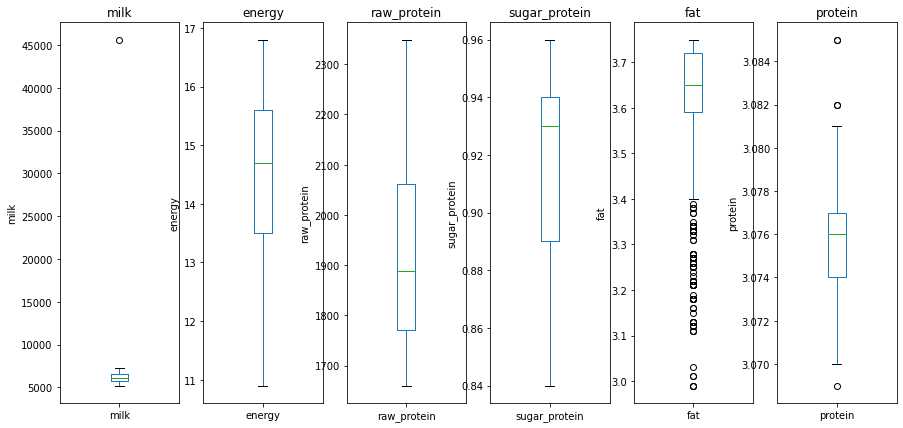

In [33]:
# построение графиков для количественных признаков набора данных о ферме
cols = ['milk', 
        'energy', 
        'raw_protein', 
        'sugar_protein', 
        'fat', 
        'protein']

plt_box(ferma_main, cols)

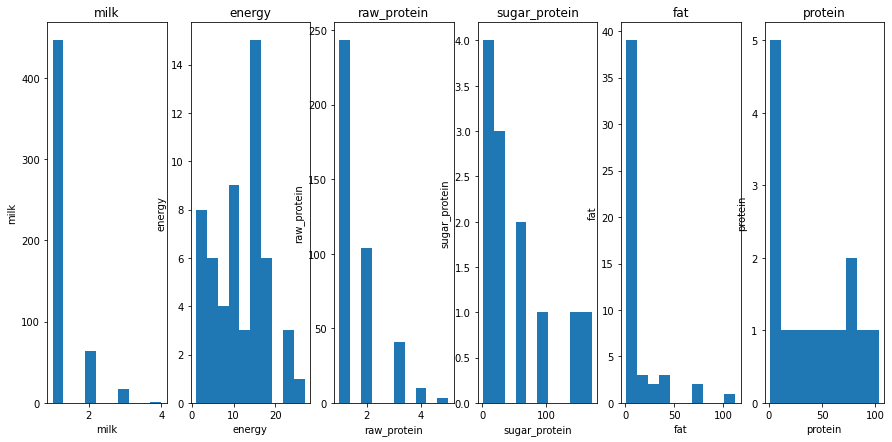

In [34]:
# построение гистограмм количественных признаков
plt_hist(ferma_main, cols)

In [35]:
# проверка выброса в 'milk'
ferma_main[ferma_main['milk'] > 10000]

,id,milk,energy,raw_protein,sugar_protein,breed,pasture,breed_father,fat,protein,taste,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет


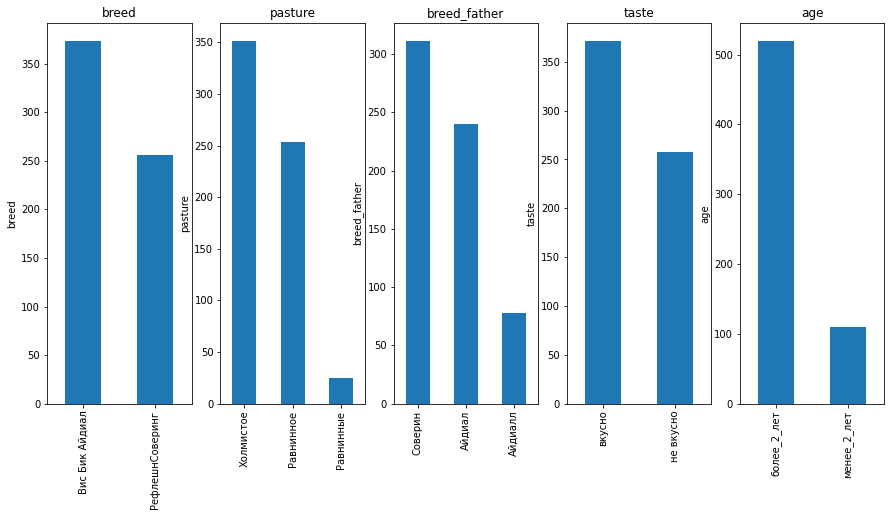

In [36]:
# построение графиков для категориальных признаков набора данных о ферме
cols = ['breed', 
        'pasture', 
        'breed_father', 
        'taste', 
        'age']

plt_bar(ferma_main, cols)

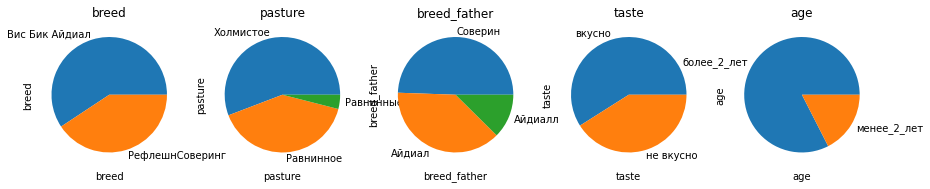

In [37]:
# построение круговых диаграмм для категориальных признаков
plt_pie(ferma_main, cols)

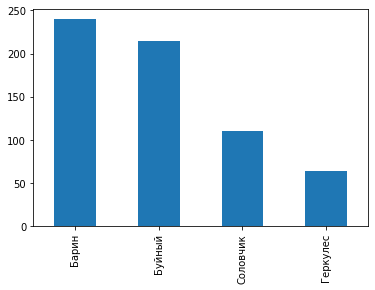

In [38]:
# построение графиков категориального признака
# набора данных об отцах коров
ferma_dad['father_name'].value_counts().plot(kind='bar')
plt.show()

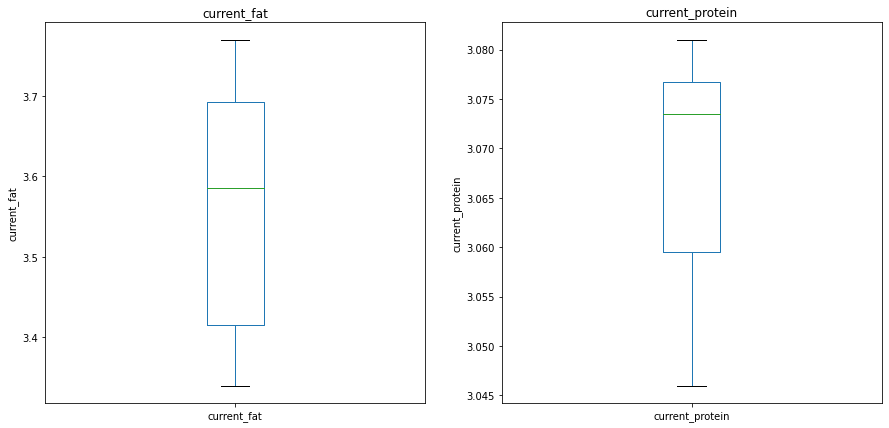

In [39]:
# построение графиков количественных признаков 
# набора данных о покупке коров
cols = ['current_fat', 'current_protein']

plt_box(cow_buy, cols)

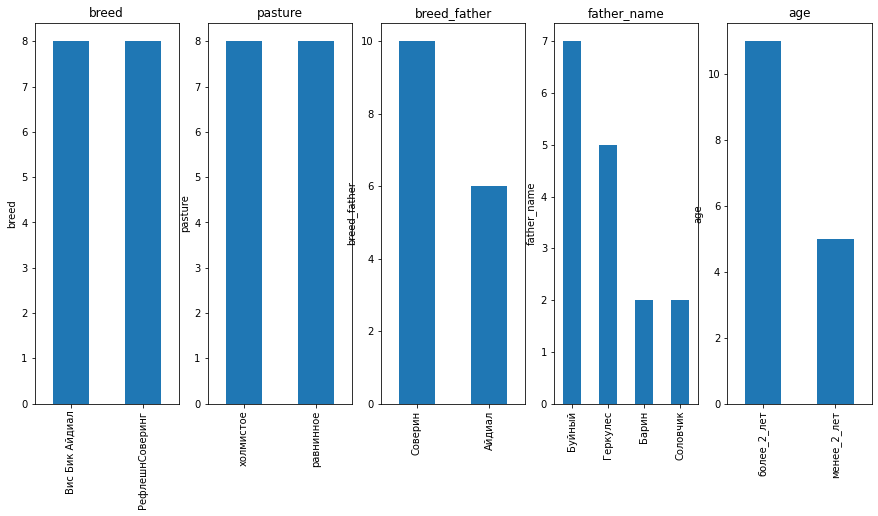

In [40]:
# построение графиков категориальных признаков
# набора данных о покупке коров
cols = ['breed', 'pasture', 'breed_father', 'father_name', 'age']

plt_bar(cow_buy, cols)

<a id='section_id13'></a>
### 3.3. Выводы о данных
[к содержанию](#section_id)

        Количественные признаки ferma_main:
        'milk' - существует аномально большое значение удоя молока, более 45 т, нормальными же можно считать значения от 5 т до 10 т. Это значение всего одно, его можно отбросить.
        'fat', 'protein' - выбросы на графике - значения, отклоняющиеся в пределах процента, с этими значениями можно работать дальше без обработки
        Количественные признаки необходимо будет стандартизировать, чтобы более адекватно оценить вклад каждого из признаков.
        Количественные признаки cow_buy какими-то выделяющимися значениями не обладают. Эти признаки также необходимо будет стандартизировать.
        В столбце "pasture", необходимо заменить значения "Равнинные" на "Равнинное", в столбце "breed_father" значения "Айдиалл" на "Айдиал". Категориальные признаки ferma_main, ferma_dad, cow_buy необходимо будет закодировать для работы с моделями машинного обучения.

Количество значений с выбросами ferma_main: 629
Количество значений без выбросов ferma_main: 628


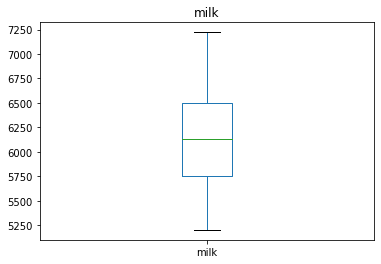

In [41]:
# отбросим выбросы 'milk' набора данных о ферме
print('Количество значений с выбросами ferma_main:', len(ferma_main))
ferma_main = ferma_main[ferma_main['milk'] < 10000]
print('Количество значений без выбросов ferma_main:', len(ferma_main))

# изменения на диаграмме размаха
ferma_main['milk'].plot(
    kind='box',
    title='milk',
    )
plt.show()

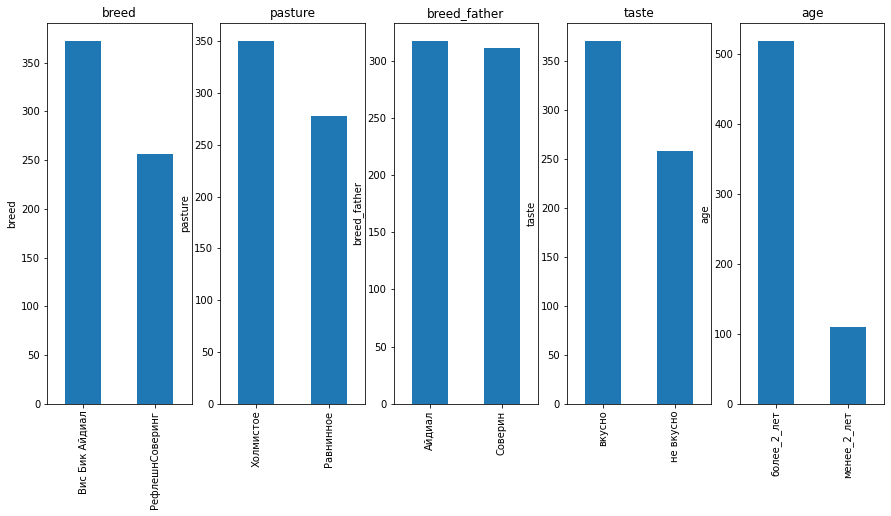

In [42]:
# замена "Равнинные" на "Равнинное" в столбце "pasture"
ferma_main['pasture'] = ferma_main['pasture'].str.replace('Равнинные', 'Равнинное')
# замена "Айдиалл" на "Айдиал" в столбце "breed_father"
ferma_main['breed_father'] = ferma_main['breed_father'].str.replace('Айдиалл', 'Айдиал')
# построение исправленных графиков для категориальных признаков набора данных о ферме
cols = ['breed', 
        'pasture', 
        'breed_father', 
        'taste', 
        'age']

plt_bar(ferma_main, cols)

<a id='section_id14'></a>
## 4. Корреляционный анализ
[к содержанию](#section_id)

<a id='section_id15'></a>
### 4.1. Коэффициенты корреляции
[к содержанию](#section_id)

,id,milk,energy,raw_protein,sugar_protein,fat,protein
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547
milk,-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
energy,-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
raw_protein,-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
sugar_protein,-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
fat,0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
protein,0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


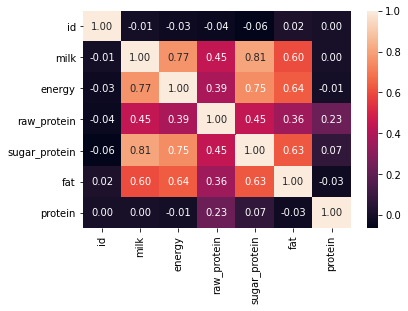

In [43]:
# расчет коэффициентов корреляции между всеми признаками
display(ferma_main.corr())

sns.heatmap(ferma_main.corr(), annot=True, fmt='.2f')
plt.show()

<a id='section_id16'></a>
### 4.2. Диаграммы рассеяния
[к содержанию](#section_id)

In [44]:
# функция для построения диаграмм рассеяния
def plt_scatter(data, num_col, cat_col):
    '''функция принимает на вход набор данных, списки столбцов количественных и категориальных признаков,
    строит диаграммы рассеяния.'''
    # создаем список для хранения данных по разным категориальным признакам
    data_by_cats = []
    # собираем данные в список, делая срез по переданной категории
    for value in data[cat_col].unique():
        features = data.loc[:, [cat_col, num_col, 'milk']]
        data_by_cats.append(features[features[cat_col] == value])
        
    # отображаем субплоты с данными по категориям
    fig, ax = plt.subplots(ncols=len(data_by_cats), sharey=True, figsize=(14, 7))
    fig.suptitle('milk with ' + num_col + ' by ' + cat_col, fontsize=20)
    
    for j, c in enumerate(ax):
        cat = data_by_cats[j]
        cat.plot(ax=c, kind='scatter', x=num_col, y='milk', color=np.random.rand(1,3))
        c.set_title(cat_col, fontsize=20)
        c.set_xlabel(cat[cat_col].iloc[0], fontsize=20)
        c.set_ylabel('milk', fontsize=20)

    plt.show()

In [45]:
# проверка
print(plt_scatter.__doc__)

функция принимает на вход набор данных, списки столбцов количественных и категориальных признаков,
    строит диаграммы рассеяния.


In [46]:
# построение диаграмм рассеяния удоя
# и всех количественных признаков
# с учетом значения категориальных

num_cols = ['energy', 
        'raw_protein', 
        'sugar_protein', 
        'fat', 
        'protein']
cat_cols = ['breed', 
        'pasture', 
        'breed_father', 
        'taste', 
        'age']



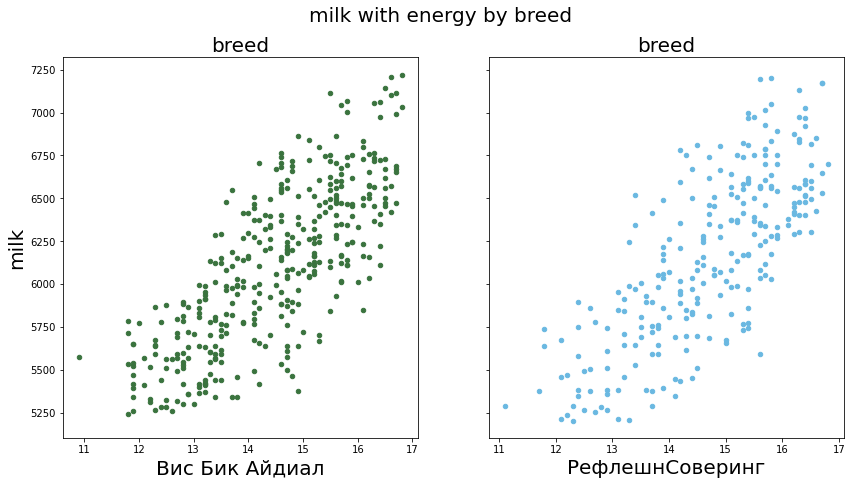

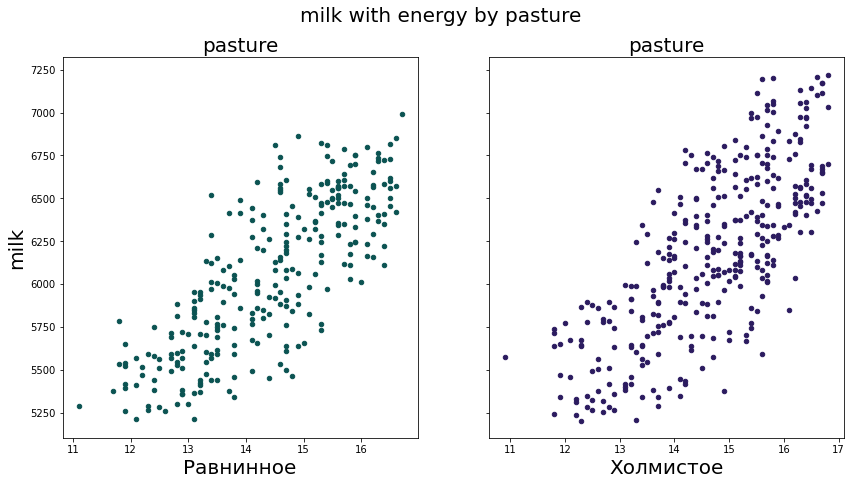

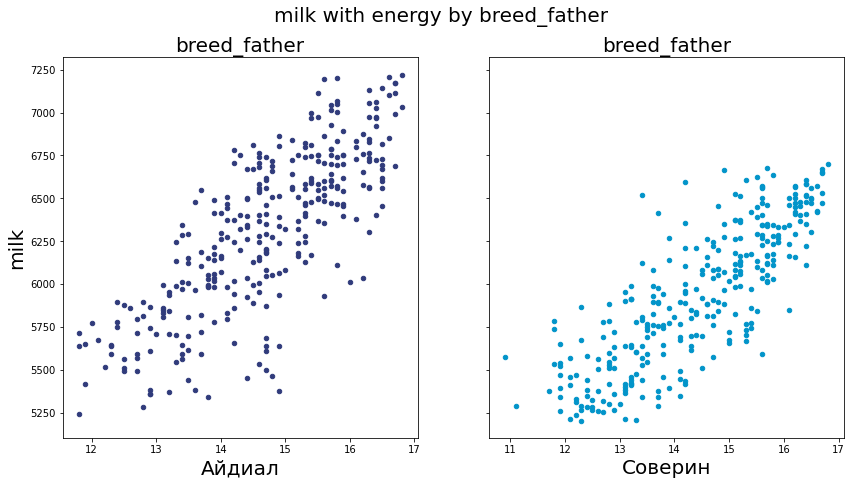

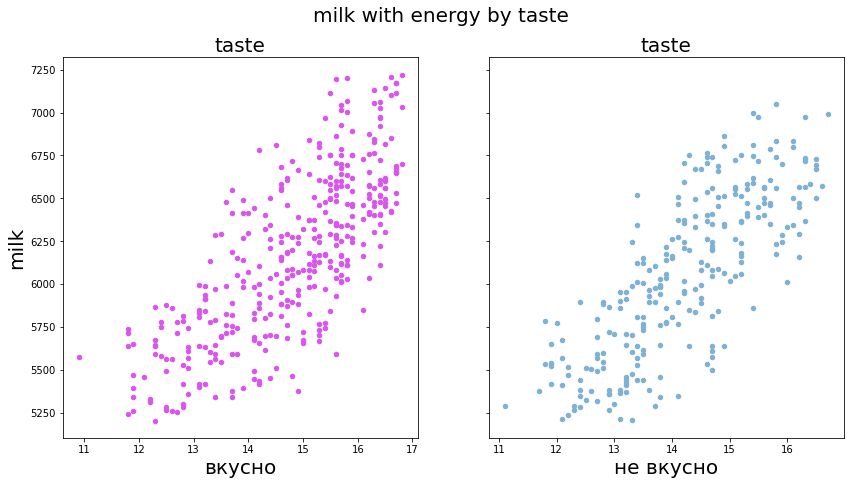

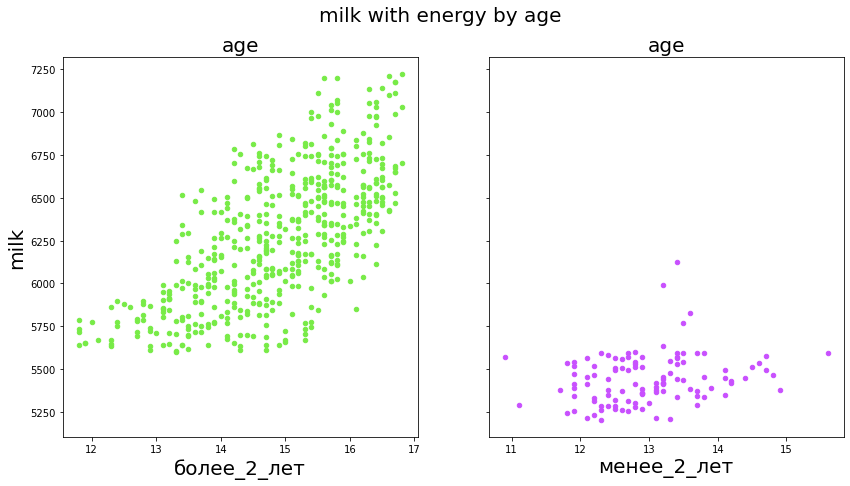

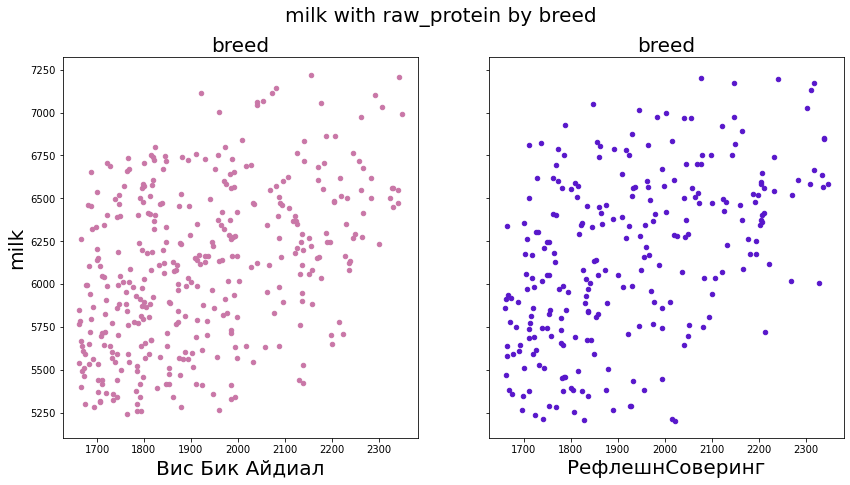

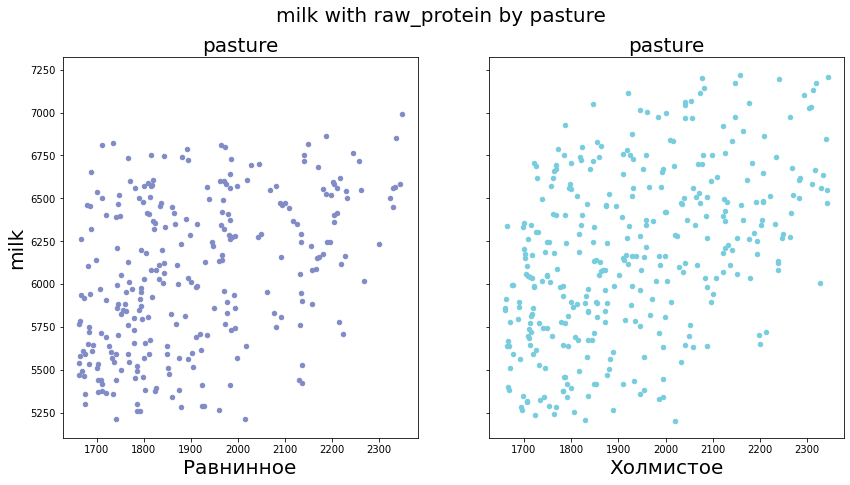

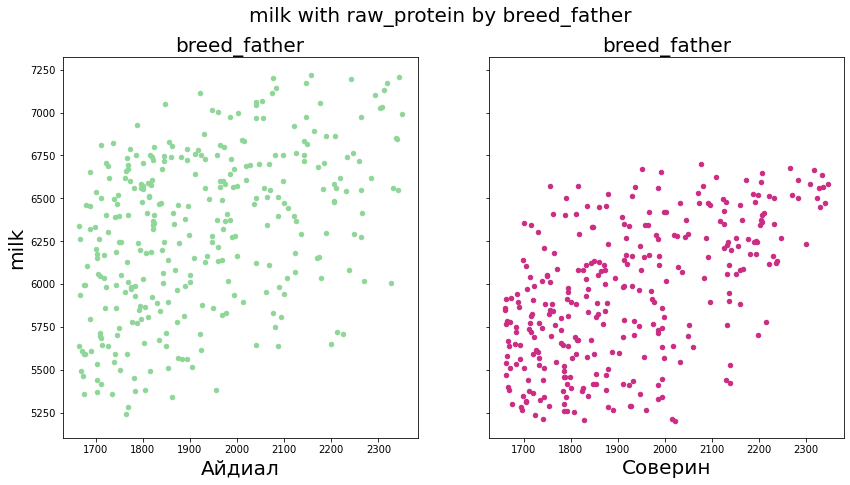

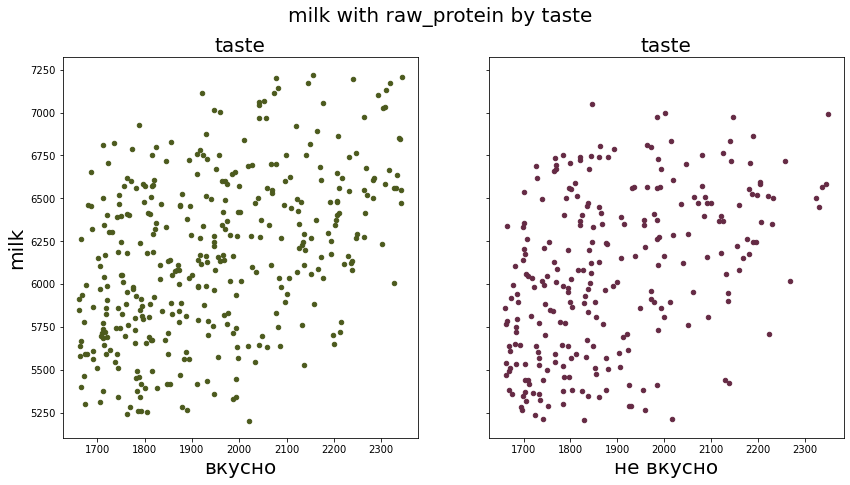

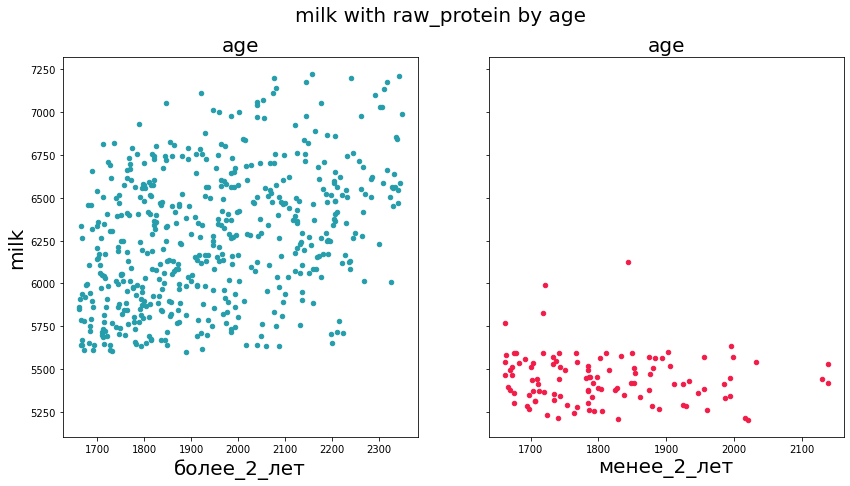

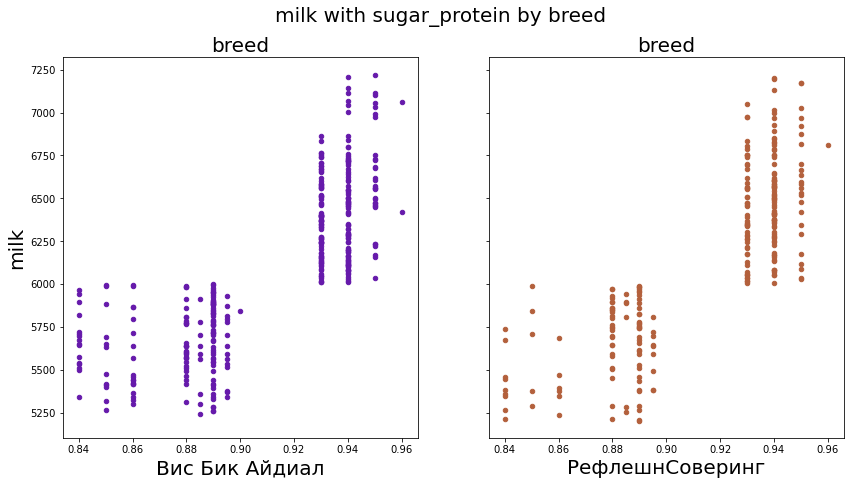

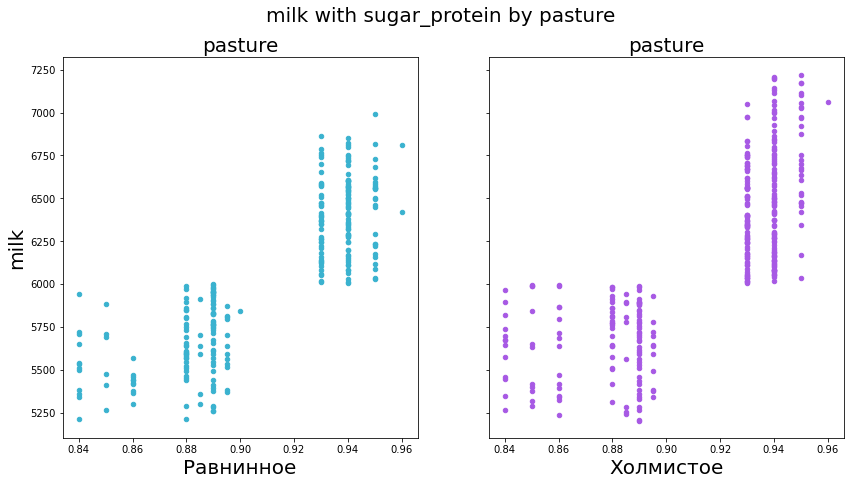

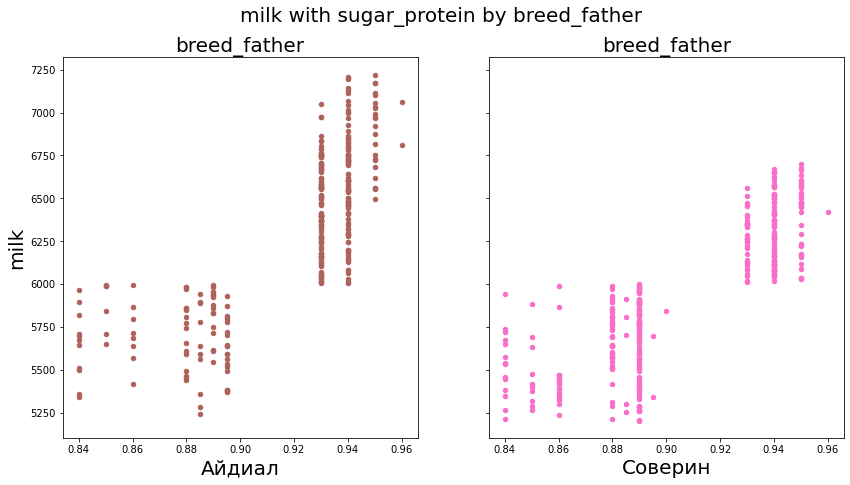

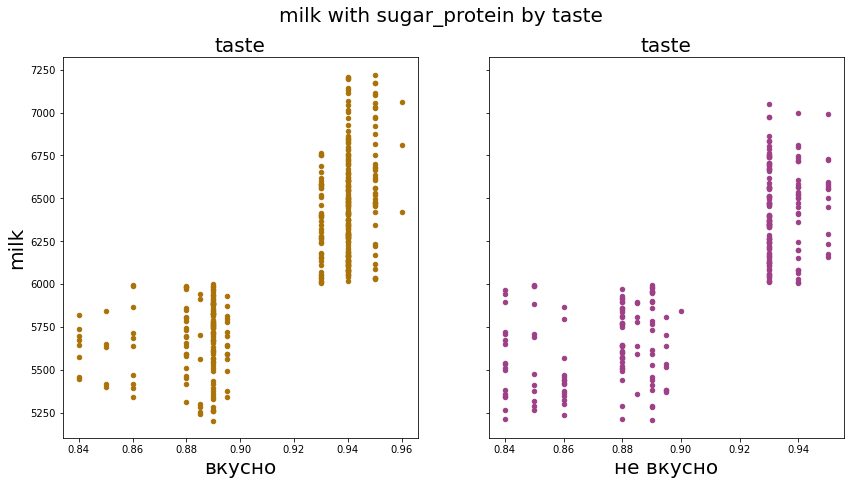

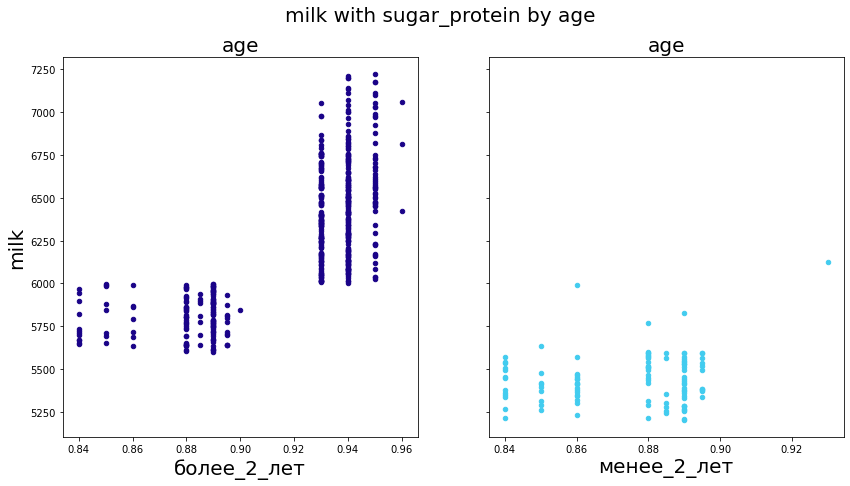

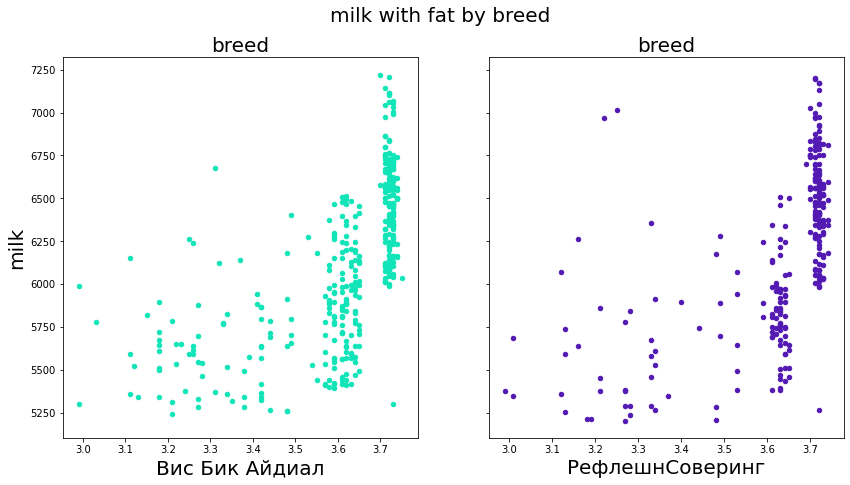

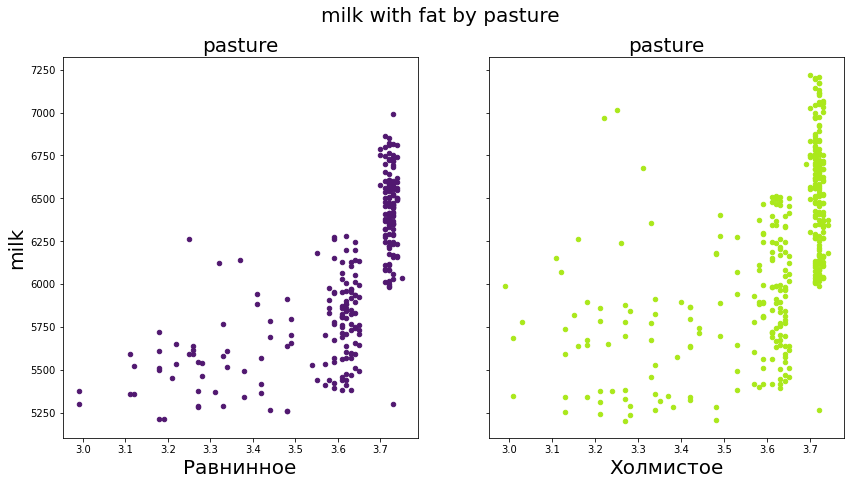

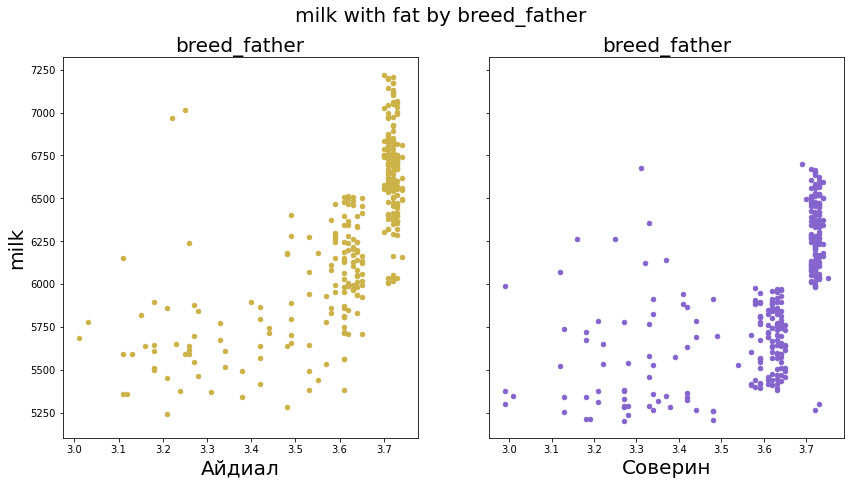

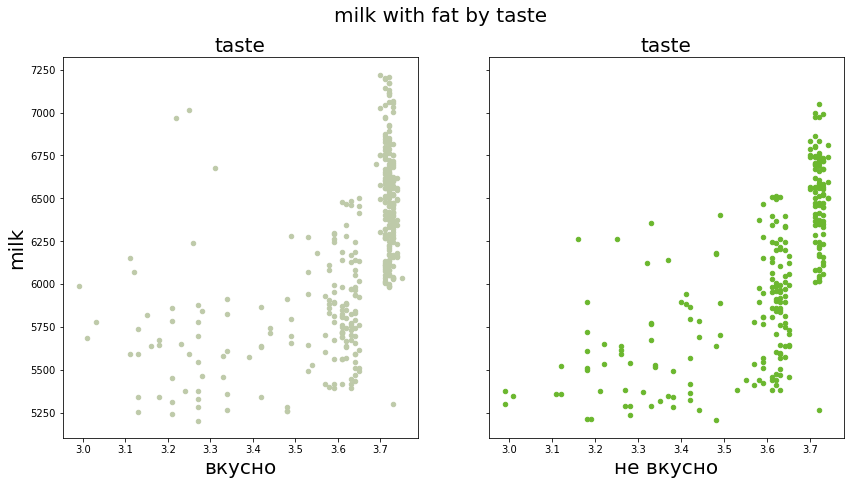

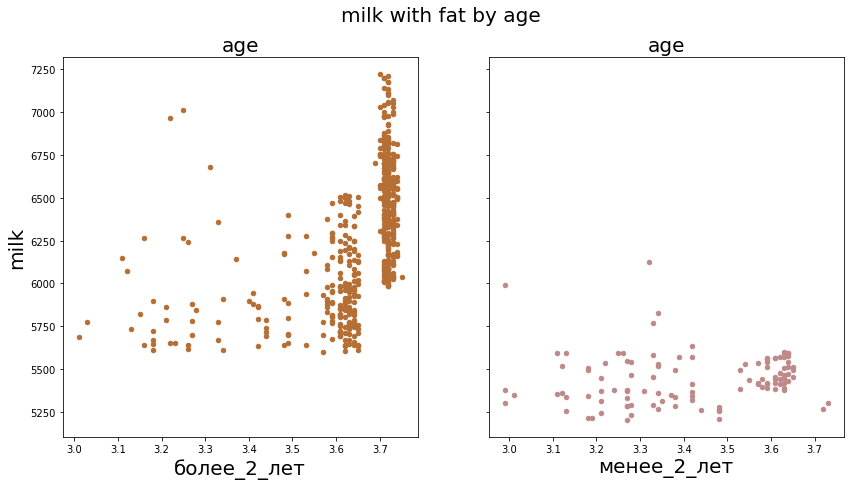

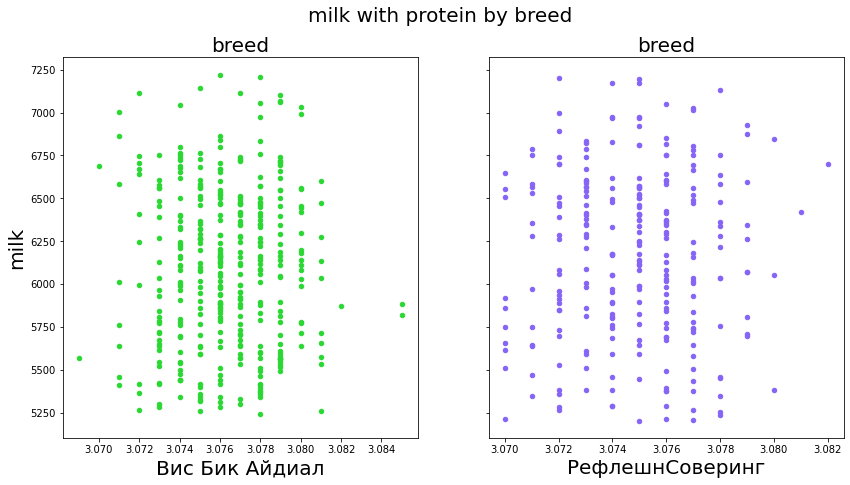

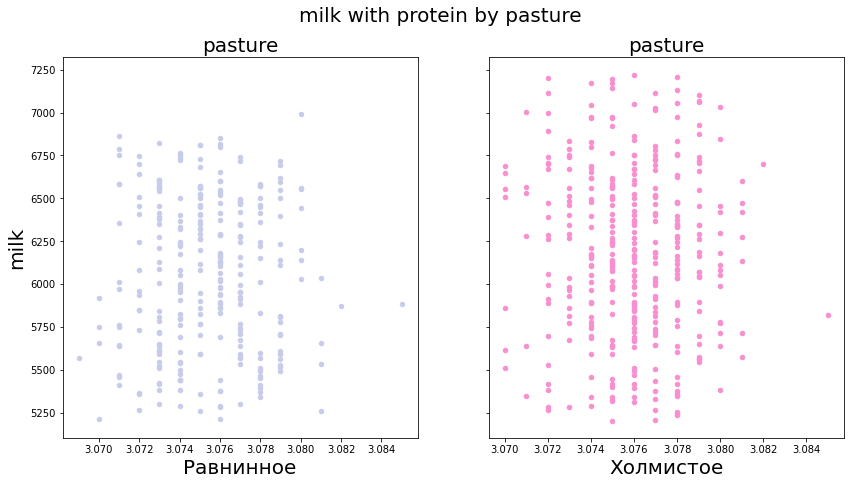

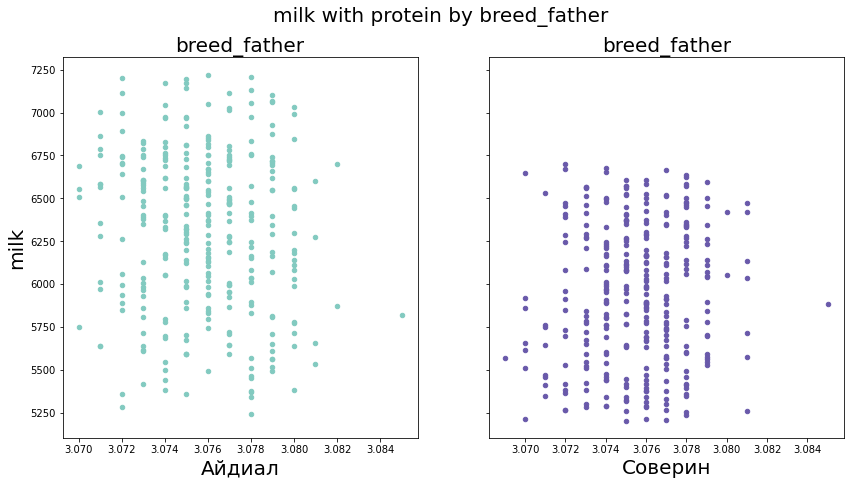

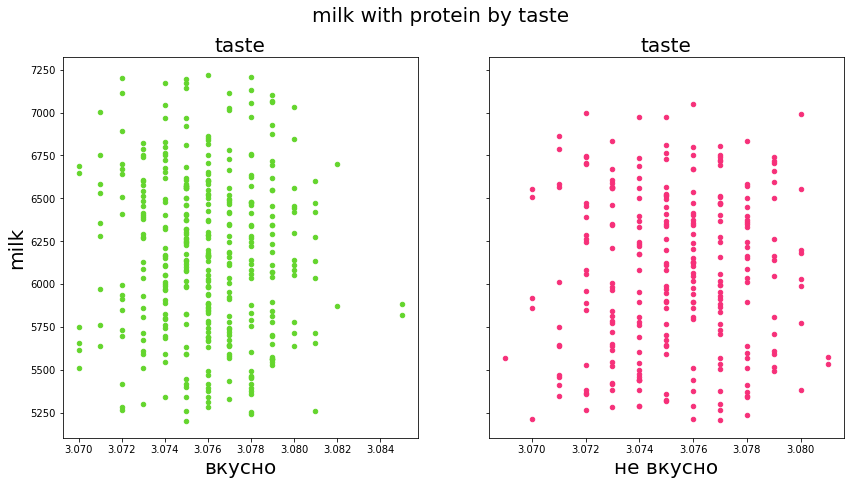

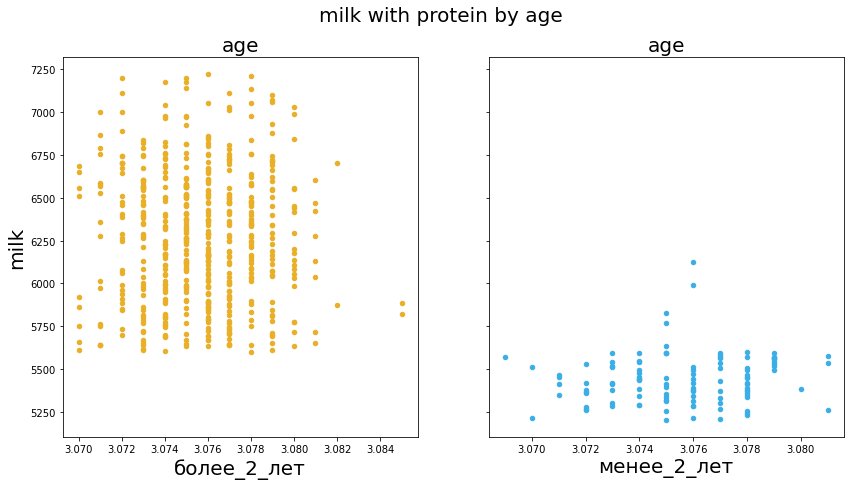

In [47]:
# построение диаграмм рассеяния удоя с другими количественными параметрами
# с разделениями по значениям категориальных признаков
for num in num_cols:
    for cat in cat_cols:
        plt_scatter(ferma_main, num, cat)

<a id='section_id17'></a>
### 4.3. Выводы о взаимосвязи признаков
[к содержанию](#section_id)

        'milk' и 'energy' - явно прослеживается взаимосвязь между объемом удоя и питательностью корма коровы, чем выше питательность, тем выше удой. В таблице коээффициентов корреляции между признаками удоя и питательности корма значение 0.77 - тесная корреляция по шкале Чедвика. Коровы старше 2 лет дают больше молока при увеличении питательности корма чем коровы младше 2 лет, и также коровы, чей папа был породы Айдиал, дают больше молока при увеличении питательности корма, чем коровы, чей папа был породы Соверин.

        'milk' и 'raw_protein' - прослеживается зависимость небольшого повышения удоя при росте характеристики сырого протеина в корме. В таблице коээффициентов корреляции между признаками удоя и питательности корма значение 0.45 - умеренная корреляция по шкале Чедвика. Коровы чей папа был породы Айдиал и коровы старше 2 лет показывают больший удой при увеличении содержания сырого протеина в корме.
        
        'milk' и 'sugar_protein' - прослеживается зависимость повышения удоя при росте отношения сахара к протеину в корме. В таблице коээффициентов корреляции между признаками удоя и питательности корма значение 0.81 - тесная корреляция по шкале Чедвика. Коровы старше 2 лет дают больше молока при увеличении 'sugar_protein'.
        
        'milk' и 'fat' - прослеживается взаимосвязь между удоем и жирностью молока. В таблице коээффициентов корреляции между признаками удоя и питательности корма значение 0.60 - заметная корреляция по шкале Чедвика. Однако по смыслу от увеличения жирности не повысится удой и наоборот. Характеристики молока не влияют на его объем.
        
        'milk' и 'protein' - корреляции между удоем и содержанием белков в молоке нет.
        
        Присутствуют нелинейная связь между 'sugar_protein' и 'milk'. Виден разрыв в значениях до и после уровня 0.92 'sugar_protein'. Если модели машинного обучения будут работать некорректно, можно попробовать отбросить признак 'sugar_protein' или закодировать его таким образом, что значения до 0.92 будут кодироваться нулями, а выше единицами.
        
        Не заметно зависимости между двумя целевыми признаками. Вкус не зависит от удоя. Мультиколлинеарность не обнаружена.
        

<a id='section_id18'></a>
## 5. Задача регрессии
[к содержанию](#section_id)

        Целевой признак - удой, столбец 'milk'.
        В наборе данных выберем для обучения модели количественные признаки, которые имеют корреляцию с удоем:
            'energy' - из соображений, что питательность корма влияет на удой, корреляция 0.77;
            'raw_protein' - из соображений, что содержание белка в корме влияет на удой, корреляция 0.45;
            'sugar_protein' - из соображений, что отношение сахара к белку влияет на удой, корреляция 0.81;
            'fat' - жирность молока рассматривать не будем, так как свойства молока не влияют на его объем.
        Для улучшения свойств тренировочной выборки выполним стандартизацию значений этих столбцов.
        Из категориальных признаков выберем:
            'breed' - порода, какие-то породы дают больше молока, чем другие;
            'pasture' - тип пастбища, может влиять на удой;
            'breed_father' - порода отца также может влиять на удой потомков;
            'age' - более взрослая корова крупнее, скорее всего она даёт больше молока.
        Категориальные признаки необходимо будет закодировать перед оправкой в модель.

In [48]:
# функция для сборки тренировочной и тестовой выборки
def make_train_test(X, y, num_cols=[], cat_cols=[], other_cols=[]):
    '''Принимает на вход набор данных признаков, целевой признак, список столбцов количественных,
    категориальных признаков, и признаков, которые не нужно будет обрабатывать. Возвращает тренировочную
    и тестовую выборки для набора признаков и целевого признака.'''
    # выбор только нужных колонок
    X = X[num_cols + cat_cols + other_cols]
    
    # производим деление на выборки
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
    )
    
    return X_train, X_test, y_train, y_test

In [49]:
# функция для кодирования категориальных признаков
def code_cat(X_train, X_test, cat_cols):
    '''функция принимает на вход набор данных тренировочной выборки признаков, тестовой выборки признаков и
    список столбцов категориальных признаков, возвращает обученный энкодер, кодированную тренировочную
    и тестовую выборку.'''
    # инициализация метода кодирования (используем защиту от dummy ловушек
    # так как в столбцах категориальных признаков всего 2 различных значения)
    encoder = OneHotEncoder(drop='first', sparse=False)

    # кодирование тренировочной выборки
    X_train_ohe = encoder.fit_transform(X_train[cat_cols])

    # кодирование тестовой выборки
    X_test_ohe = encoder.transform(X_test[cat_cols])

    # получаем список столбцов, полученных в результате кодирования 
    encoder_col_names = encoder.get_feature_names()

    # создаём объект pd.DataFrame из получившихся в результате преобразования np.ndarray
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    #print(X_train_ohe, X_test_ohe)
    
    return encoder, X_train_ohe, X_test_ohe

In [50]:
# функция для масштабирования количественных признаков
def scale_num(X_train, X_test, num_cols):
    '''функция принимает на вход набор данных тренировочной и тестовой выборки и список столбцов
    количественных признаков, возвращает обученный скейлер, отмасштабированную тренировочную и
    тестовую выборки.'''
    # инициализация метода масштабирования
    scaler = StandardScaler()

    # обучение скейлера на тренировочной выборке
    scaler.fit(X_train[num_cols])

    # масштабирование тренировочной выборки
    X_train_scaled =  scaler.transform(X_train[num_cols])

    # масштабирование тестовой выборки
    X_test_scaled = scaler.transform(X_test[num_cols])

    # создаём объект pd.DataFrame из получившихся в результате преобразования np.ndarray
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)
    
    #print(X_train_scaled, X_test_scaled)
    
    return scaler, X_train_scaled, X_test_scaled

In [51]:
# функция для сборки обработанных признаков в тренировочную и тестовую выборки
def assemble_X(X_train_ohe, X_train_scaled, X_test_ohe, X_test_scaled, X_train, X_test, other_cols):
    '''функция принимает на вход наборы данных, признаков, которые были обработаны
    разными способами и объединяет их в наборы тренировочной и тестовой выборки.'''
    X_train_ohe_scaled = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test_ohe_scaled = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    if other_cols:
        X_train = pd.concat([X_train_ohe_scaled, X_train[other_cols].reset_index(drop=True)], axis=1)
        X_test = pd.concat([X_test_ohe_scaled, X_test[other_cols].reset_index(drop=True)], axis=1)
    else:
        X_train = X_train_ohe_scaled
        X_test = X_test_ohe_scaled
    
    return X_train, X_test

In [52]:
# функция для обучения модели линейной регрессии
def do_linear(X_train, X_test, y_train, y_test):
    '''Функция обучает модель линейной регрессии, получает предсказания, вычисляет остатки
    строит график распределения остатков и диаграмму рассеяния, возвращает обученную модель
    линейной регрессии, предсказания, коэффициент детерминации модели, остатки.'''
    # инициализация модели линейной регрессии
    model_lr  = LinearRegression()

    # обучение модели на тренировочных данных
    model_lr.fit(X_train, y_train)

    # получение предсказания модели
    predictions = model_lr.predict(X_test)
    
    # оценка работы модели с помощью метрики r2_score
    r2score = r2_score(y_test, predictions)
    print(f'r2_score = {r2score:.2f}')
    
    # расчёт остатков
    residuals = y_test - predictions

    # построение графиков
    fig, axes = plt.subplots(ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    return model_lr, predictions, r2score, residuals

In [53]:
# сборная функция для проработки модели линейной регрессии
def full_linear(X, y, num_cols, cat_cols, other_cols):
    '''функция принимает на вход набор признаков и целевой признак, список столбцов количественных признаков,
    категориальных признаков, и признаков, которым не нужна предобработка, возвращает тестовую часть
    целевого признака, энкодер, скейлер, модель линейной регрессии, предсказания, коэффициент
    детерминации и остатки.'''
    # разбиение данных на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = make_train_test(X, y, num_cols, cat_cols, other_cols)
    # кодирование категориальных признаков
    encoder, X_train_ohe, X_test_ohe = code_cat(X_train, X_test, cat_cols)
    # масштабирование количественных признаков
    scaler, X_train_scaled, X_test_scaled = scale_num(X_train, X_test, num_cols)
    # объединение масштабированных и кодированных данных
    X_train, X_test = assemble_X(X_train_ohe, X_train_scaled, X_test_ohe, X_test_scaled, X_train, X_test, other_cols)
    #print(X_train.head())
    # обучение модели линейной регрессии
    model_lr, predictions, r2score, residuals = do_linear(X_train, X_test, y_train, y_test)
    
    return y_test, encoder, scaler, model_lr, predictions, r2score, residuals

<a id='section_id19'></a>
### 5.1. Обучение модели 1 линейной регрессии
[к содержанию](#section_id)

In [54]:
# сбор всех возможных колонок для трёх моделей регрессии
X = ferma_main.merge(ferma_dad, on='id')

# кодирование признака 'sugar_protein'
X['sugar_protein_coded'] = X['sugar_protein'].apply(lambda val: 0.0 if val <= 0.92 else 1.0 )

# возведение в квадрат признака 'energy'
X['energy_squared'] = X['energy']**2

# выбор целевого признака
y = ferma_main['milk']

Модель линейной регрессии №1
r2_score = 0.78


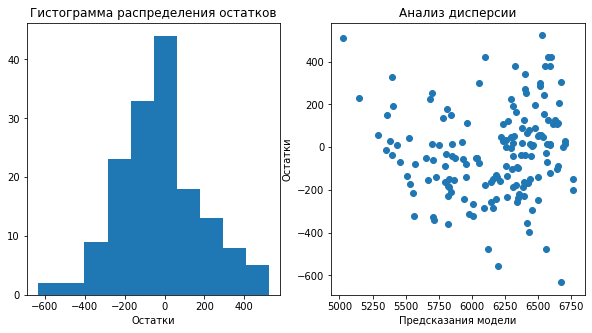

In [55]:
# рассматриваемые признаки
num_cols = ['energy', 
    'raw_protein', 
    'sugar_protein',]

cat_cols = ['breed', 
    'pasture', 
    'breed_father', 
    'age']

other_cols = []

print("Модель линейной регрессии №1")
# обучение первой модели линейной регрессии
(y_test,
encoder1,
scaler1,
model_lr1,
predictions1,
r2score1,
residuals1) = full_linear(X, y, num_cols, cat_cols, other_cols)

        Вывод:
        Коэффициент детерминации r2_score модели равен 0.78, это значит, что прогнозные значения в 78% случаев точнее чем средние значения для целевого признака удоя молока. Уровень качества прогнозов модели удовлетворительный.
        Остатки имеют симметричное относительно нуля равномерное распределение. Это значит, что модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга. Судя по этому признаку модель работает качественно. Однако происходит чередование высокой и низкой дисперсии остатков, прогнозы модели недостаточно надежны. Необходимо устранить неравномерную дисперсию остатков. Попробуем удалить нелинейность в признаках тестовой выборки.
        Дополнительные исследования нужны, так как они могут исправить неравномерную дисперсию и поднять качество прогнозов модели.

<a id='section_id20'></a>
### 5.2. Обучение модели 2 линейной регрессии
[к содержанию](#section_id)

        Ранее было обнаружено, что СПО 'sugar_protein' и удой 'milk' связаны нелинейно. Закодируем данный признак как категориальный. Признак ЭКЕ 'energy' для второй модели возведем в квадрат.

Модель линейной регрессии №2
r2_score = 0.82


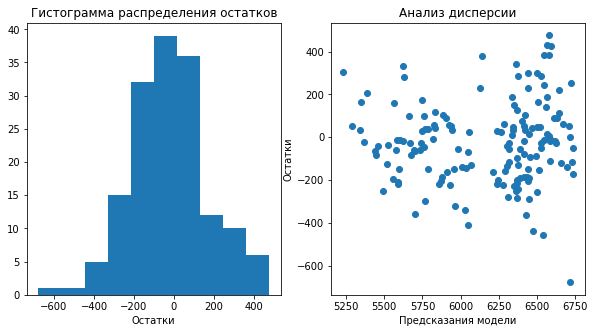

In [56]:
# рассматриваемые признаки
num_cols = ['energy_squared', 
    'raw_protein']

cat_cols = ['breed',
    'breed_father',
    'pasture', 
    'age']

other_cols = ['sugar_protein_coded']

print("Модель линейной регрессии №2")
# обучение первой модели линейной регрессии
(y_test, 
encoder2, 
scaler2, 
model_lr2, 
predictions2, 
r2score2, 
residuals2) = full_linear(X, y, num_cols, cat_cols, other_cols)

        Вывод:
        Коэффициент детерминации r2_score модели равен 0.82, значение улучщилось, кодирование признака 'sugar_protein' и возведение в квадрат 'energy' помогло улучшить прогнозы модели.
        Остатки имеют симметричное относительно нуля равномерное распределение. Неравномерность дисперсии остатков уменьшилась.
        С помощью дополнительных исследований можно поднять качество модели.

<a id='section_id21'></a>
### 5.3. Обучение модели 3 линейной регрессии
[к содержанию](#section_id)

Модель линейной регрессии №3
r2_score = 0.82


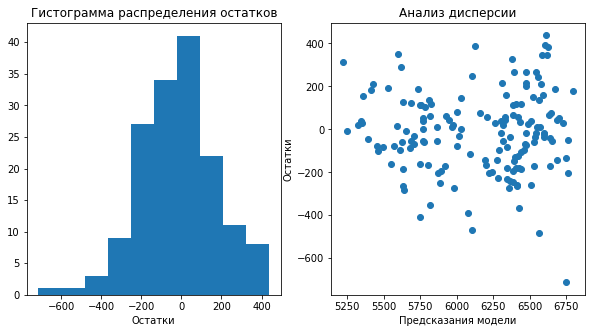

In [57]:
# рассматриваемые признаки
num_cols = ['energy_squared', 
    'raw_protein']

cat_cols = ['breed', 
    'pasture', 
    'breed_father', 
    'age',
    'father_name']

other_cols = ['sugar_protein_coded']

print("Модель линейной регрессии №3")
# обучение первой модели линейной регрессии
(y_test, 
encoder3,
scaler3,
model_lr3, 
predictions3, 
r2score3, 
residuals3) = full_linear(X, y, num_cols, cat_cols, other_cols)

        Вывод:
        Коэффициент детерминации r2_score модели равен 0.82, значение не изменилось по сравнению со 2ой моделью, кодирование признака 'father_name' не помогло улучшить прогноз.
        Остатки имеют симметричное относительно нуля равномерное распределение. Неравномерность дисперсии остатков не изменилась.

<a id='section_id22'></a>
### 5.4. Сравнение качества моделей
[к содержанию](#section_id)

        Коээфициенты детерминации моделей:
    1ая модель (стандартизация, кодирование) - 0.78
    2ая модель (устранение нелинейности, стандартизация, кодирование) - 0.82
    3я модель (добавление признака, устранение нелинейности, стандартизация, кодирование) - 0.82
        Устранение нелинейности, стандартизация и кодирование позволило увеличить коэффициент детерминации модели. Добавление признака не повлияло на коэффициент.
        Остатки были равномерно распределены во всех случаях, устранение нелинейности помогло уменьшить их дисперсию, а добавление нового признака не повлияло на результат.

<a id='section_id23'></a>
### 5.5. Оценка качества с помощью метрик
[к содержанию](#section_id)

,Модель №1,Модель №2,Модель №3
MSE,43887.015010,37030.911311,35673.889886
MAE,164.241945,149.039652,146.163024
RMSE,209.492279,192.434174,188.875329


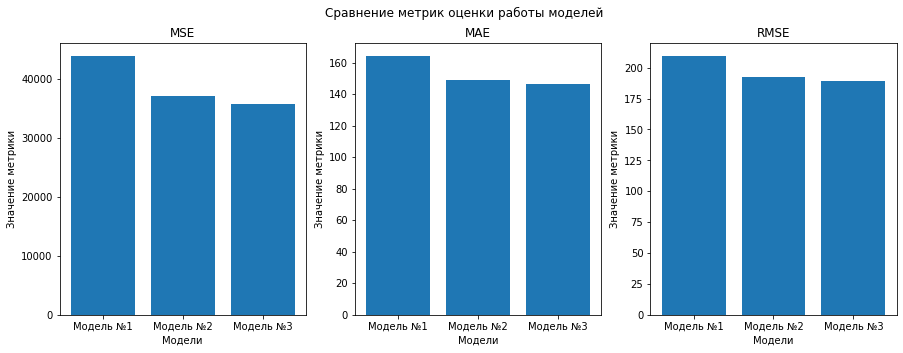

In [58]:
# предсказания каждой модели
models = ['Модель №1', 'Модель №2', 'Модель №3']
predictions = [predictions1, predictions2, predictions3]

# оценка MSE
mses = []
for pred in predictions:
    mse = mean_squared_error(y_test, pred)
    mses.append(mse)
    
# оценка MAE
maes = []
for pred in predictions:
    mae = mean_absolute_error(y_test, pred)
    maes.append(mae)
    
# оценка RMSE
rmses = []
for pred in predictions:
    rmse = mean_squared_error(y_test, pred, squared=False)
    rmses.append(rmse)
    
# метрики
metrics = [mses, maes, rmses]
titles = ['MSE', 'MAE', 'RMSE']
  
# табличный вывод
metr = pd.DataFrame(metrics, columns=models, index=titles)
display(metr)
    
# изобразим на графике
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
fig.suptitle('Сравнение метрик оценки работы моделей')

for j, ax in enumerate(axes):
    ax.bar(models, metrics[j])
    ax.set_title(titles[j])
    ax.set_xlabel('Модели')
    ax.set_ylabel('Значение метрики')
    
plt.show()

**Вывод**

    Модель №3 имеет лучшие показатели по метрикам MSE, MAE и RMSE (наименьшие значения ошибок). Используем её для предсказания удоя.

In [59]:
# доверительный интервал прогноза модели №3
print('95% доверительный интервал модели №3:',
      st.norm.interval(confidence=0.95,
                       loc=np.mean(predictions3), 
                       scale=st.sem(predictions3)))

95% доверительный интервал модели №3: (6092.340075854288, 6221.3750700583805)


        Модель №3 имеет доверительный интервал прогноза от 6092.34 до 6221.36 грамм удоя. Это значит, что среднее значение генеральной совокупности, которое мы пытаемся предсказать с 95% вероятностью попадёт в этот интервал.

<a id='section_id24'></a>
### 5.6. Прогноз удоя
[к содержанию](#section_id)

In [60]:
# обзор cow_buy
display(cow_buy.head())

,breed,pasture,breed_father,father_name,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [61]:
# формирование набора признаков для определения удоя покупаемых коров
Xbuy = cow_buy.copy()

# замена значений для корректного кодирования признака 'pasture'
Xbuy['pasture'] = Xbuy['pasture'].str.replace('холмистое', 'Холмистое')
Xbuy['pasture'] = Xbuy['pasture'].str.replace('равнинное', 'Равнинное')

# добавление признаков
Xbuy['energy'] = ferma_main['energy'].mean() * 1.05
Xbuy['raw_protein'] = ferma_main['raw_protein'].mean() * 1.05
Xbuy['sugar_protein'] = ferma_main['sugar_protein'].mean() * 1.05

# кодирование признака 'sugar_protein'
Xbuy['sugar_protein_coded'] = Xbuy['sugar_protein'].apply(lambda val: 0.0 if val <= 0.92 else 1.0 )

# возведение в квадрат признака 'energy'
Xbuy['energy_squared'] = Xbuy['energy']**2

# рассматриваемые признаки
num_cols = ['energy_squared', 
    'raw_protein']

cat_cols = ['breed', 
    'pasture', 
    'breed_father', 
    'age',
    'father_name']

other_cols = ['sugar_protein_coded']

In [62]:
# обработка признаков
# кодирование категориальных признаков
Xbuy_ohe = encoder3.transform(Xbuy[cat_cols])

# получаем список столбцов, полученных в результате кодирования 
encoder_col_names = encoder3.get_feature_names()

# создаём объект pd.DataFrame из получившихся в результате преобразования np.ndarray
Xbuy_ohe = pd.DataFrame(Xbuy_ohe, columns=encoder_col_names)

# масштабирование количественных признаков
Xbuy_scaled = scaler3.transform(Xbuy[num_cols])

# создаём объект pd.DataFrame из получившихся в результате преобразования np.ndarray
Xbuy_scaled = pd.DataFrame(Xbuy_scaled, columns=num_cols)

# объединение признаков
Xbuy_test = pd.concat([Xbuy_ohe, Xbuy_scaled, Xbuy[other_cols].reset_index(drop=True)], axis=1)

# прогнозирование удоя
cow_buy_milk_pred = model_lr3.predict(Xbuy_test)

In [63]:
# добавление прогноза в таблицу
cow_buy_pred = cow_buy.copy().reset_index(drop=True)
cow_buy_pred['milk_pred'] = cow_buy_milk_pred
display(cow_buy_pred)

,breed,pasture,breed_father,father_name,current_fat,current_protein,age,milk_pred
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.089377
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.380218
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6344.707860
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6617.928926


<a id='section_id25'></a>
### 6. Задача классификации
[к содержанию](#section_id)

In [64]:
# сформируем набор признаков
# сбор всех возможных столбцов для модели логистической регрессии
X = ferma_main.merge(ferma_dad, on='id')

# кодирование признака 'sugar_protein'
X['sugar_protein_coded'] = X['sugar_protein'].apply(lambda val: 0.0 if val <= 0.92 else 1.0 )

# возведение в квадрат признака 'energy'
X['energy_squared'] = X['energy']**2

# выбор целевого признака
y = ferma_main['taste']

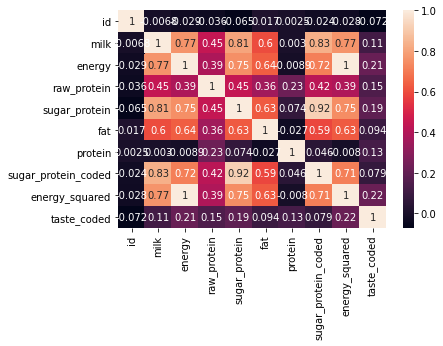

In [65]:
 #  для предварительного анализа построим тепловую карту корреляции
X['taste_coded'] = X['taste'].replace('не вкусно', '0')
X['taste_coded'] = X['taste_coded'].replace('вкусно', '1')
X['taste_coded'] = X['taste_coded'].astype('float64')
ax = sns.heatmap(X.corr(), annot=True)

Набор признаков тренировочной выборки для классификации был сформирован на основании нескольских статей из интернета, которые утверждают, что для человека ценна жирность и содержание белков. Для коровы при этом важными факторами являются порода, возраст, условия содержания на ферме:
        
        - ЭКЕ ('energy_squared')
        - содержание белка в корме ('raw_protein')
        - отношение сахаров к белкам в корме ('sugar_protein_coded')
        - наследственность коровы ('breed', 'breed_father', 'father_name')
        - тип пастбища ('pasture')
        - возраст ('age')
        - жирность ('fat')
        - содержание белка ('protein')
        
Целевой признак - вкус молока (столбец 'taste')

Произведем обработку признаков, которые уже рассматривались похожим образом, а 'fat' и 'protein' подвергнем стандартизации как количественные признаки.

In [66]:
# функция для обучения модели логистической регрессии
def do_log(X_train, X_test, y_train, y_test, ):
    '''функция принимает на вход наборы данных признаков и целевого признака тренировочной и тестовой выборки,
    возвращает обученную модель логистической регрессии и предсказания.'''
    # инициализация модели логистической регрессии
    model_log  = LogisticRegression()

    # обучение модели на тренировочных данных
    model_log.fit(X_train, y_train)

    # получение предсказания модели
    predictions = model_log.predict(X_test)
    
    return model_log, predictions

<a id='section_id26'></a>
### 6.1. Обучение модели логистической регрессии
[к содержанию](#section_id)

In [67]:
# определение столбцов признаков
num_cols = ['energy_squared', 
            'raw_protein',
           'fat',
           'protein']

cat_cols = ['breed', 
    'pasture', 
    'breed_father', 
    'age',
    'father_name']

other_cols = ['sugar_protein_coded']

# разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = make_train_test(X, y, num_cols, cat_cols, other_cols)

In [68]:
# кодирование категориальных признаков
encoder_log, X_train_ohe, X_test_ohe = code_cat(X_train, X_test, cat_cols)

# масштабирование количественных признаков
scaler_log, X_train_scaled, X_test_scaled = scale_num(X_train, X_test, num_cols)

# объединение масштабированных и кодированных данных
X_train, X_test = assemble_X(X_train_ohe, X_train_scaled, X_test_ohe, X_test_scaled, X_train, X_test, other_cols)

In [69]:
# обучени модели логистической регрессии
model_log, predictions = do_log(X_train, X_test, y_train, y_test)

In [70]:
# прогноз модели на тестовых данных
y_pred = model_log.predict(X_test)

# расчёт метрик модели
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='вкусно')
precision = precision_score(y_test, y_pred, pos_label='вкусно')

print('accuracy: ',round(accuracy ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.631
recall:  0.864
precision:  0.623


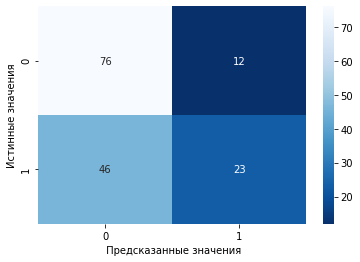

In [71]:
# построение матрицы ощибок
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
ax.set(xlabel=' Предсказанные значения', ylabel='Истинные значения')
plt.show()

<a id='section_id27'></a>
### 6.2. Анализ модели
[к содержанию](#section_id)

        Доля ошибочных прогнозов модели велика. Проанализируем confusion matrix:
        
        Ошибка первого рода (FP) - 12 значений, в знаменателе метрики precision, ошибку можно понимать как покупку коровы, вкус молока которой прогнозировался как "вкусно", но в реальности молоко оказалось "не вкусно".
        Ошибка второго рода (FN) - 76 значений, в знаменателе метрика recall, ошибку можно понимать как ошибочное предсказание, что молоко у коров будет "не вкусно" для перспективных коров.
        Критичными для заказчика, который ориентирован вкус являются ошибки первого рода (он хочет производить только вкусное молоко). Поэтому модель необходимо настроить так, чтобы увеличилась метрика precision, нужно свести ошибки первого рода к минимуму. Для этого следует поднять порог классификации.

In [72]:
# подбор порога классификации для сведения ошибки 1 ого рода к нулю
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]

# создаем набор данных, с двумя столбцами: значение y_test, и результат работы классификатора
y_proba = model_log.predict_proba(X_test)[:,0]
data = pd.DataFrame(zip(y_test, y_proba),
columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

# добавляем столбец с результатом классификации при заданном пороге
# и рассчитываем количество ошибок первого рода
t1_errors = []
for i in thresholds:
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 'вкусно' if x>= i else 'не вкусно')
    errors = data[(data['y_valid'] == 'не вкусно') 
                  & (data['y_pred_'+str(i)] == 'вкусно')]['y_pred_'+str(i)].count()
    t1_errors.append(errors)
    
pr = pd.DataFrame(zip(thresholds, t1_errors), columns=['threshold', 't1_errors'])
display(pr)

,threshold,t1_errors
0,0.10,69
1,0.19,69
2,0.28,68
3,0.37,63
4,0.46,53
5,0.55,39
6,0.64,16
7,0.73,6
8,0.82,0
9,0.91,0


In [73]:
# отображение результатов подбора порога
display(data)

,y_valid,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,y_pred_0.82,y_pred_0.91
85,вкусно,0.861369,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно
110,вкусно,0.842813,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно
66,вкусно,0.841492,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно
51,вкусно,0.839685,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно
8,вкусно,0.817310,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно,не вкусно
...,...,...,...,...,...,...,...,...,...,...,...,...
141,не вкусно,0.322466,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
119,не вкусно,0.320970,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
47,не вкусно,0.317255,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
46,не вкусно,0.304640,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно


In [74]:
# перерасчёт значения метрик precision и recall
precision = precision_score(data['y_valid'], data['y_pred_0.82'], pos_label='вкусно')
recall = recall_score(data['y_valid'], data['y_pred_0.82'], pos_label='вкусно')

print('precision: ',round(precision,3))
print('recall: ',round(recall ,3))

precision:  1.0
recall:  0.045


При выборе значения порога классификации 0.82 достигается 0 ошибок первого рода. То есть фермер будет отбирать только коров, которые точно дадут вкусное молоко. Однако значение recall большое, существует большая вероятность не купить перспективных коров. Возможно существуют другие признаки, которые сильнее влияют на вкус молока, с помощью которых можно добиться более низкого показателя recall при уровне precision 1.00. С их помощью дальнейшем можно было бы улучшить модель.

<a id='section_id28'></a>
### 6.3. Прогноз вкуса молока
[к содержанию](#section_id)

In [75]:
# формирование набора признаков для определения удоя покупаемых коров
Xbuy = cow_buy.copy()

# замена значений для корректного кодирования признака 'pasture'
Xbuy['pasture'] = Xbuy['pasture'].str.replace('холмистое', 'Холмистое')
Xbuy['pasture'] = Xbuy['pasture'].str.replace('равнинное', 'Равнинное')

# добавление признаков
Xbuy['energy'] = ferma_main['energy'].mean() * 1.05
Xbuy['raw_protein'] = ferma_main['raw_protein'].mean() * 1.05
Xbuy['sugar_protein'] = ferma_main['sugar_protein'].mean() * 1.05

# кодирование признака 'sugar_protein'
Xbuy['sugar_protein_coded'] = Xbuy['sugar_protein'].apply(lambda val: 0.0 if val <= 0.92 else 1.0 )

# возведение в квадрат признака 'energy'
Xbuy['energy_squared'] = Xbuy['energy']**2

# рассматриваемые признаки
num_cols = ['energy_squared', 
    'raw_protein',
    'current_fat',
    'current_protein']

cat_cols = ['breed', 
    'pasture', 
    'breed_father', 
    'age',
    'father_name']

other_cols = ['sugar_protein_coded']

In [76]:
# обработка признаков
# кодирование категориальных признаков
Xbuy_ohe = encoder_log.transform(Xbuy[cat_cols])

# получаем список столбцов, полученных в результате кодирования 
encoder_col_names = encoder_log.get_feature_names()

# создаём объект pd.DataFrame из получившихся в результате преобразования np.ndarray
Xbuy_ohe = pd.DataFrame(Xbuy_ohe, columns=encoder_col_names)

# масштабирование количественных признаков
Xbuy_scaled = scaler_log.transform(Xbuy[num_cols])

# создаём объект pd.DataFrame из получившихся в результате преобразования np.ndarray
Xbuy_scaled = pd.DataFrame(Xbuy_scaled, columns=num_cols)

# объединение признаков
Xbuy_test = pd.concat([Xbuy_ohe, Xbuy_scaled, Xbuy[other_cols].reset_index(drop=True)], axis=1)

# прогнозирование удоя
cow_buy_taste_pred = model_log.predict_proba(Xbuy_test)[:,0]
cow_buy_taste_pred = pd.Series(cow_buy_taste_pred).apply(lambda x: 'вкусно' if x >= 0.64 else 'не вкусно')

In [77]:
cow_buy_taste_pred

0        вкусно
1        вкусно
2     не вкусно
3     не вкусно
4     не вкусно
5     не вкусно
6        вкусно
7        вкусно
8     не вкусно
9     не вкусно
10    не вкусно
11       вкусно
12    не вкусно
13       вкусно
14    не вкусно
15    не вкусно
dtype: object

In [78]:
# добавление прогноза в таблицу
cow_buy_pred['taste_pred'] = cow_buy_taste_pred
display(cow_buy_pred)

,breed,pasture,breed_father,father_name,current_fat,current_protein,age,milk_pred,taste_pred
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.089377,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.380218,не вкусно
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737,вкусно
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668,вкусно
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6344.707860,не вкусно
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6617.928926,не вкусно


<a id='section_id29'></a>
## 7. Итоговые выводы
[к содержанию](#section_id)

В набор данных о покупке коров были добавлены данные, спрогнозированные моделями машинного обучения. Ниже представлены данные о коровах, которых можно купить согласно представленным требованиям (удой более 6000 килограммов в год и вкусное молоко).

In [79]:
# отбор коров для покупки
current_buy = cow_buy_pred[(cow_buy_pred['milk_pred'] >= 6000) & (cow_buy_pred['taste_pred'] == 'вкусно')]
display(current_buy)

,breed,pasture,breed_father,father_name,current_fat,current_protein,age,milk_pred,taste_pred
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,вкусно
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737,вкусно
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668,вкусно
11,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,6127.474742,вкусно
13,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,6344.707860,вкусно


С помощью модели линейной регрессии и признакам, которые имели корреляцию с удоем был спрогнозирован удой для покупаемых коров. Было разработано 3 модели, в каждой из которых проводилось обучение на различных наборах признаках с разной обработкой значений. В итоге была выбрана модель, которая показала лучший результат по метрикам оценки качества (коэффициент детерминации, среднеквадратическая ошибка, средняя абсолютная ошибка). Вкус молока был спрогнозирован путем обучения модели классификации на признаках, которые могут влиять на вкус молока, и подбора параметра порог классификации для минимизации ошибок первого рода (обеспечения покупки только коров с вкусным молоком).

В результате из данных о 16 коровах, потенциальных кандидатов для покупки, было выбрано 6 с удоем более 6000 г и вкусным молоком. Покупка этих коров несет минимальный риск того, что у коровы будет невкусное молоко, так как был использован высокий порог классификации модели. Вместе с тем, существует риск пропустить коров, которые дают большой удой, но которых не отобрала модель из-за недостаточной уверенности во вкусе молока. Следует обратить внимание на коров с индексами 2, 4, 9. Они дают много молока, и при пороге классификации 0.5 их молоко классифицируется как вкусное.

В ходе решения задачи по обучению модели линейной регрессии были спользованы методы корреляционного анализа входных признаков, методы по устранению нелинейности путем кластеризации значений и возведению в квадрат для количественных признаков, методы кодирования для категориальных признаков. Результаты регрессионной модели можно улучшить при добавлении новых признаков, которые будут сильно влиять на целевой признак.

В ходе решения задачи по обучению модели классификации были использованы метрики accuracy, которая позволяет определить отношение правильных прогнозов ко всем прогнозам модели, метрики recall и precision, которые позволяют определить ошибки первого и второго рода. Ошибки первого и второго рода приводят к разным экономическим последствиям, поэтому важно определить, какая ошибка критична для конкретного бизнеса и свести её к минимуму.